In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [3]:
# loss(w) = ((y-xw).T *(y-xw)) / 2n
def Loss(X,y,w):
    loss = (y - np.dot(X,w))
    loss = np.dot(loss.T,loss) / (2*n_sample)
    return loss[0,0]  #返回值为实数

In [4]:
# loss(w)的梯度为 X.T(Xw - y)/2n
def Gradient(X,y,w):
    return np.dot(X.T,(np.dot(X,w)-y))/(2*n_sample) #返回值为列向量

In [5]:
def GradientDescent(X,y,w,iteration,lr,train_loss,X_test,y_test,test_loss):
    for i in range(iteration):
        gradient = Gradient(X,y,w)
        w = w-lr*gradient
        train_loss.append(Loss(X,y,w))
        test_loss.append(Loss(X_test,y_test,w)) #记录训练集和测试集的loss
    return w  #返回值为列向量

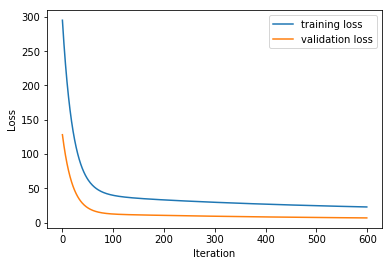

The last loss of test set is: 6.72502226116


In [56]:
data = load_svmlight_file("/home/wade/文档/housing_scale.txt")
X = data[0].toarray()  #将特征集转为506*13矩阵
number_data=len(data[1])
X = np.c_[X,np.ones((number_data,1))] #添加一列特征求偏移量
y = data[1].reshape(number_data,1) #将标记集转为501*1矩阵
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33) #将数据集切分为训练集和验证集

n_sample,n_feature= X_train.shape
w = np.zeros((n_feature,1))  #w初始化为列向量，值为0
lr = 0.01 #学习率
train_loss = []
test_loss = []
number_train = 600
w = GradientDescent(X_train,y_train,w,number_train,lr,train_loss,X_test,y_test,test_loss)
plt.plot(range(number_train),train_loss,label='training loss')
plt.plot(range(number_train),test_loss,label ="validation loss")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()
print ("The last loss of test set is:",Loss(X_test,y_test,w))